In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1. Review and Prepare the Dataset

## Task 1a) Understand the Data
Review the data set to assess distributions of the features and the target and understand 
the relationships among the features and the target.

In [6]:
train_df = pd.read_csv('./airline_dataset/train.csv')
test_df = pd.read_csv('./airline_dataset/test.csv')
df = pd.concat([train_df, test_df])
print(df.shape)
df = df.dropna(how='any')
df = df.reset_index()
del df['index']
print(df.shape)
df.head()

(129487, 26)
(129487, 26)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Order,Comfort,Service,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,4,4,5,5,25,18,2.75,4.50,4.00,0
1,0,0,25,1,2,235,3,2,3,3,...,3,1,4,1,1,6,2.75,1.50,3.25,0
2,1,1,26,1,2,1142,2,2,2,2,...,4,4,4,5,0,0,2.00,5.00,3.75,1
3,1,1,25,1,2,562,2,5,5,5,...,3,1,4,2,11,9,4.25,2.00,3.50,0
4,0,1,61,1,2,214,3,3,3,3,...,4,3,3,3,0,0,3.00,4.25,3.50,1


In [7]:
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes               int64
Order     

all columns' data type is numbreic, so we do not need to one-hot some features

In [8]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Order,Comfort,Service,satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.507410,0.816862,39.428761,0.690764,1.029910,1190.210662,2.728544,3.057349,2.756786,2.976909,...,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,2.879897,3.314265,3.502135,0.434499
std,0.499947,0.386781,15.117597,0.462180,0.962638,997.560954,1.329235,1.526787,1.401662,1.278506,...,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,1.065972,1.026412,0.957760,0.495693
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000,0.750000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.500000,2.750000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,3.000000,3.500000,3.750000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,3.750000,4.000000,4.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,1.000000


,count
satisfaction,
0,73225
1,56262


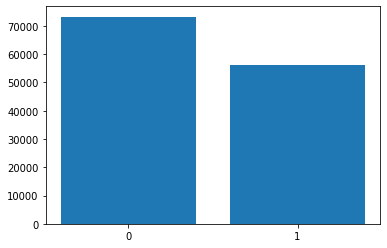

In [34]:
# taget distrubution
data = df.groupby(df['satisfaction']).count()['Age'].to_frame()
data['count'] = data['Age']
del data['Age']
x = data.index.tolist()
x = [str(i) for i in x]
plt.bar(x, data['count'])
data

the number of the unsatisfication is more than satisfication. But the difference is samll.

不满意的用户数比满意数多,但是两者在数量上的差距较小。

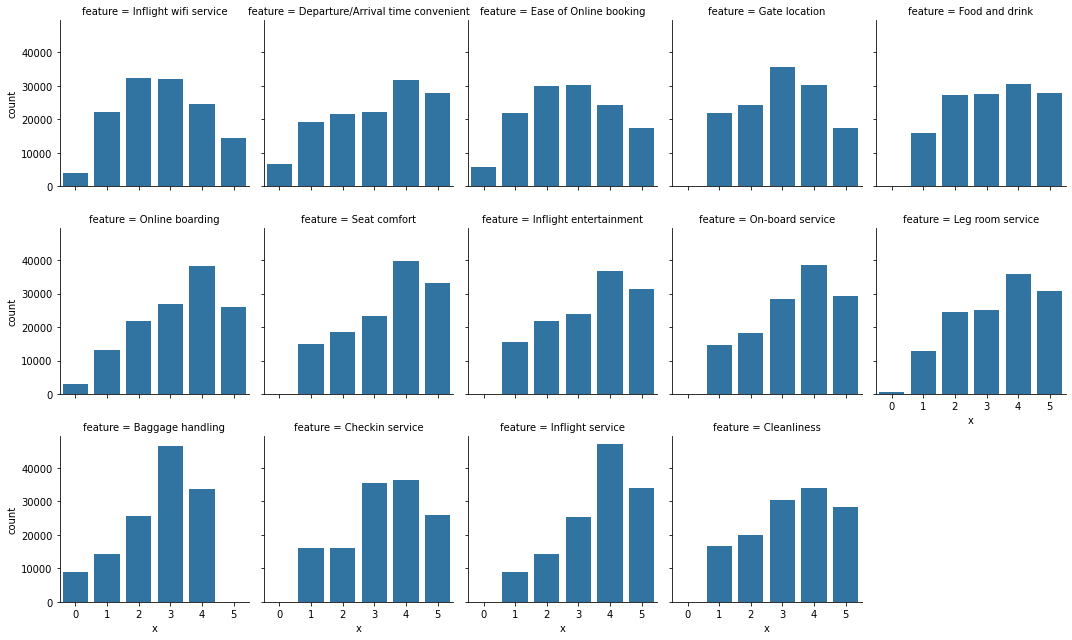

In [73]:
#  Satisfaction level distribution
level_keys = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
]

data = [
]
key = 'Cleanliness'
def key_count(key):
    data = df.groupby(df[key]).count()['satisfaction'].to_frame()
    data['count'] = data['satisfaction']
    del data['satisfaction']
    x = data.index.tolist()
    x = [str(i) for i in x]
    data['x'] = x
    data = data.reset_index()
    del data[key]
    data['feature'] = key
    return data

data = []
for key in level_keys:
    data.append(key_count(key))
data = pd.concat(data)
g = sns.FacetGrid(data, col="feature", col_wrap=5)
g.map_dataframe(sns.barplot, x="x", y="count")

Above piture is the satisfaction level (0-5) distribution.

近似正太分布的属性为:

We can see that the features that are approximate the positive distribution are: 
- `Inflight wifi Service`
- `Ease of Online bookinhg`
- `Gate Location`

右偏分布的特征为:

The features that are the right deviation distribution are:
- `Departure/Arrival time convenient`
- `Food and Drink`
- `Online Boarding`
- `Seat comfort`
- `Inflight entertainment`
- `On-board service`
- `Leg Room Service`
- `Baggage handing`
- `Checkin service`
- `Inflight service`
- `Cleanliness`

以上的特征，总体来时是偏向于正向的

The above features are generally positive.

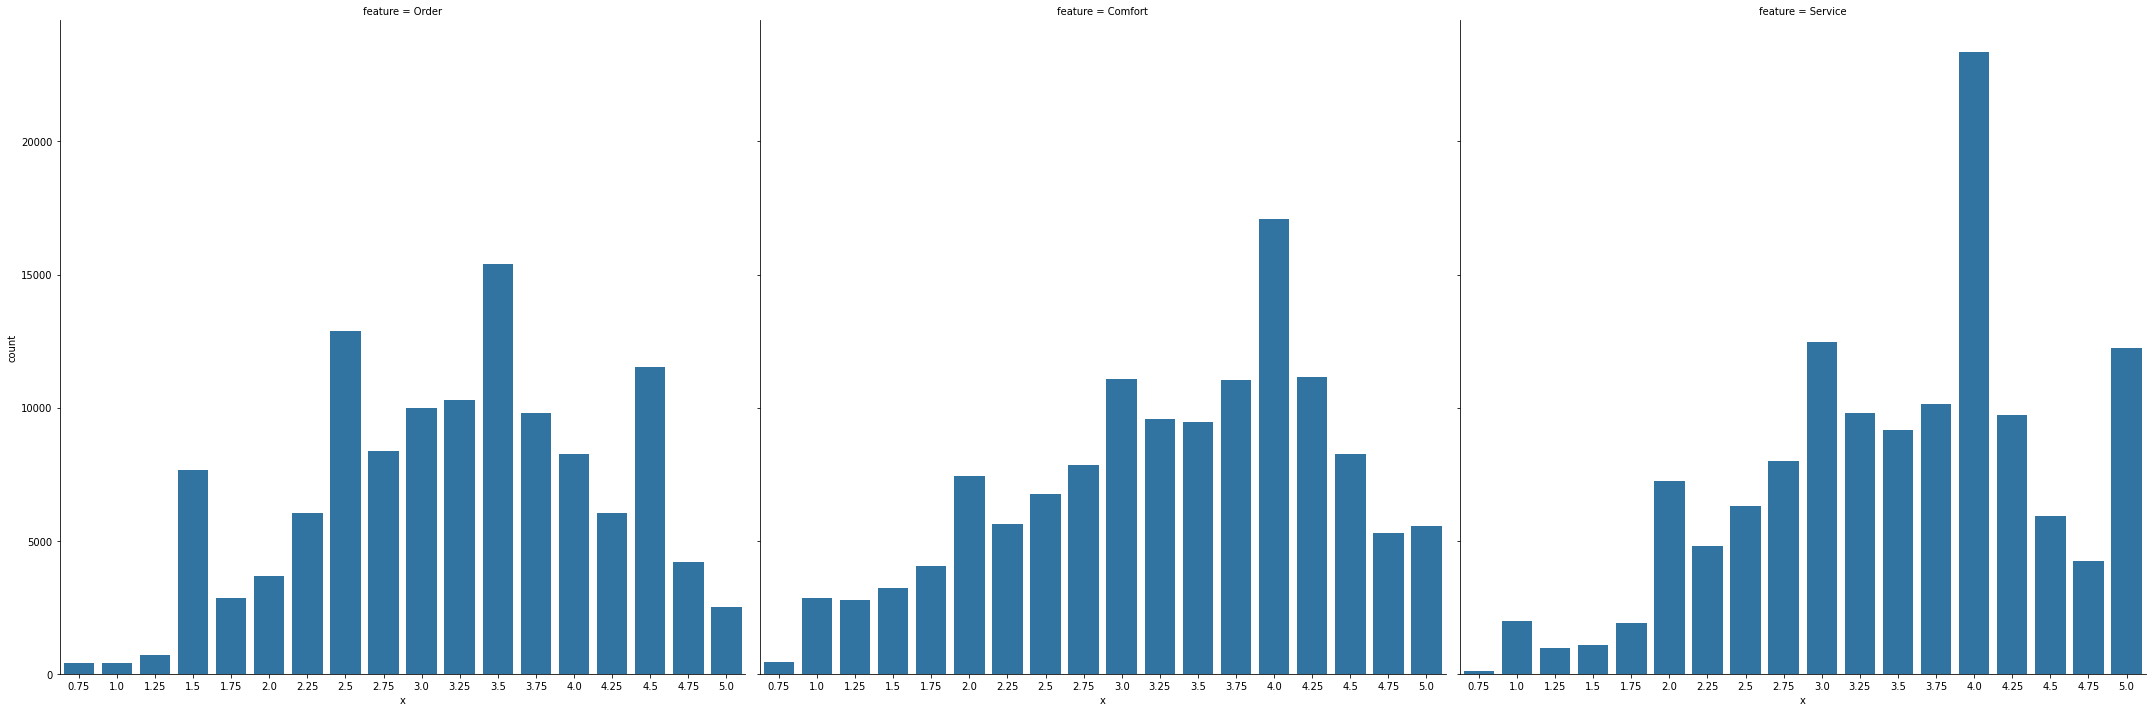

In [104]:
# Aggregate score distribution
score_keys = [
    'Order',
    'Comfort',
    'Service',
]
data = []
for key in score_keys:
    data.append(key_count(key))
data = pd.concat(data)
g = sns.FacetGrid(data, col="feature", height=10, aspect=1)
g.map_dataframe(sns.barplot, x="x", y="count")

Above piture is the aggregate score distribution(0-5) distribution.

总体上看，分布呈现出正太或者右偏性，总体上呈现出的是较高的满意度。

On the whole, the distribution shows positive or right deviation, and on the whole, it shows high satisfaction

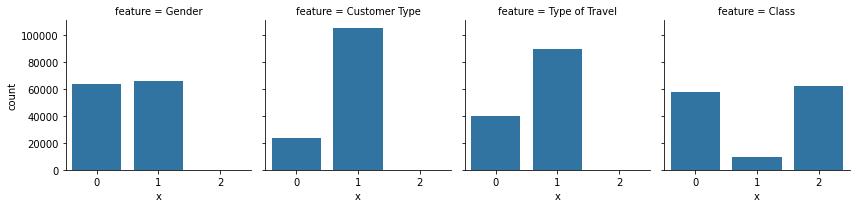

In [107]:
# other category distribution
category_keys = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class'
]
data = []
for key in category_keys:
    data.append(key_count(key))
data = pd.concat(data)
g = sns.FacetGrid(data, col="feature")
g.map_dataframe(sns.barplot, x="x", y="count")

Above piture shows other category features' distribution.

We can see that the number of the male and female is equal.

But the features like `Customer Type`、`Type of Travel`、`Class` are not uniformity.


In [ ]:
# numberic feature distribution
numberic_keys = [
    'Age', 'Flight distance'
]

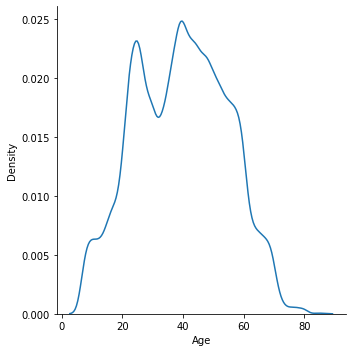

In [109]:
sns.displot(df, x='Age', kind="kde")

The Above picture shows that the distribution of age.

We can see that most part of the users' age is between `30` and `50`.

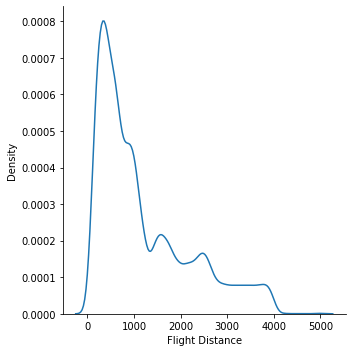

In [111]:
sns.displot(df, x='Flight Distance', kind="kde")

The feature `Flight Distance` shows a left deviation distribution.

Most users' flight distance is less that 500Km.

<AxesSubplot:>

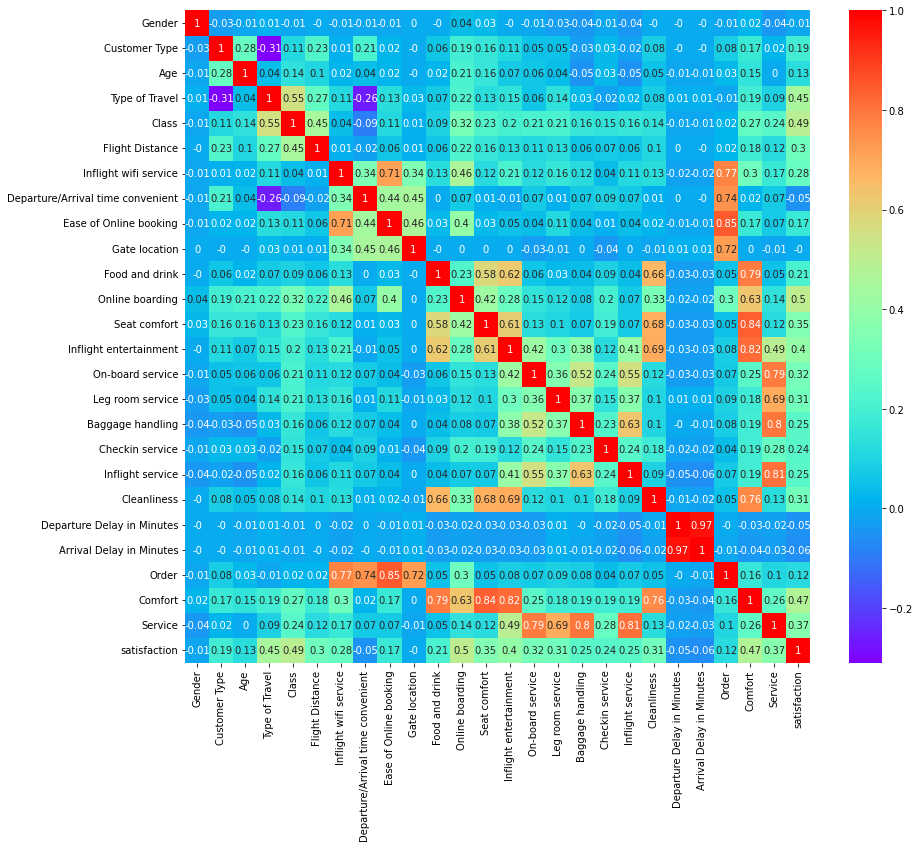

In [119]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(14, 12))
sns.heatmap(data=correlation_matrix, annot=True, cmap="rainbow")

Most features have positive correlation with the `satisfaction`. 

The features that have strong positive correlation are:
- `Class`
- `Online boarding`
- `Type of Travel`
- `Comfort`

## Task 1b) Select a Metric
Choose a metric that you will use to assess the models.
Justify your selection of a metric.

this task is a classification task, so I will user the `F1-Score` as the metric.

It consider both `Precision` and `Recall`. It finds a balance between the `Precison` and `Recall`.

## Task 1c) Prepare the data sets
Partition the data for training and evaluation.

Use either a three-way split (train/dev/test) or cross-validation.

Justify the approach to partitioning the data.

In [120]:
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['satisfaction'])].values
y = df[['satisfaction']].values.squeeze()

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [122]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5)

We hav cut the Whole dataset into three parts. First is the train dataset, which take accounts of `70% `of the whole.

Second is the valid dataset, which takes accounts of `15%` of the whole.

Second is the test dataset, which takes accounts of `15%` of the whole.

# Task 2. Train a Logistic Regression Model

Train a Logistic Regression Model (LogisticRegression in scikit-learn) that predicts the target.
You may need to either normalise the data or increase the model’s hyperparameter 
max_iter to 2000 to achieve convergence of the optimiser.

In [123]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11014
           1       0.87      0.84      0.85      8409

    accuracy                           0.88     19423
   macro avg       0.87      0.87      0.87     19423
weighted avg       0.88      0.88      0.88     19423



/Users/renweiqiang/opt/anaconda3/envs/car_clf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Assess the model’s quality of fit (bias/variance).

In [124]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def access_model_quality(clf, X, y, cv, img_title):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        clf,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    ax = plt.figure(figsize=(10, 8))
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.xlabel("Training size")
    plt.ylabel("Score")
    plt.title(img_title)
    plt.show()

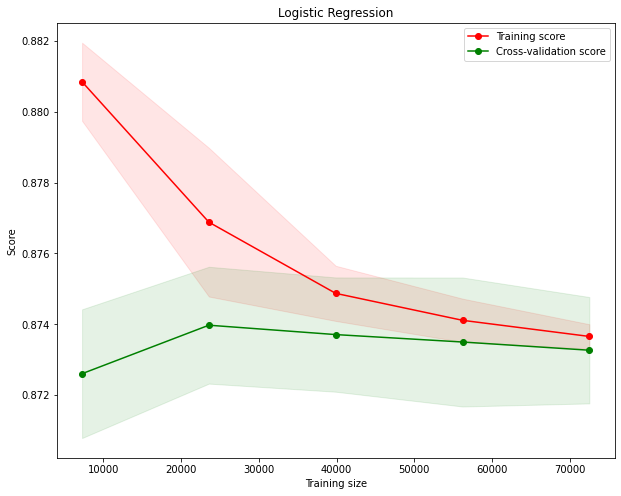

In [125]:
access_model_quality(clf, X_train, y_train, cv=5, img_title='Logistic Regression')

With the size of training dataset, the `var` is getting lower, but the `variance` is still `large`, because the `accuracy score` is still lower than expected. So we need to improve the params of the model.

伴随着训练集数量的增加，模型的偏差越来越来越小，训练集上的方差仍然较大，因此学习的能力有限。

# Task 3. Train a Decision Tree
Train a Decision Tree (DecisionTreeClassifier in scikit-learn) that predicts the target.

Optimise the model’s quality of fit by tuning its min_samples_leaf hyperparameter. 
Justify  the selection of the candidate values for the hyperparameter and describe how you 
identified its optimal value.

Assess the model’s quality of fit (bias/variance).

In [44]:
from sklearn.tree import DecisionTreeClassifier
"""
min_samples_leaf 限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，
或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生，
一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。
这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。
一般来说，建议从=5开始使用。
如果叶节点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。
同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。
对于类别不多的分类问题，=1通常就是最佳选择。

"""
tree_clf = DecisionTreeClassifier(min_samples_leaf=5)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10933
           1       0.95      0.94      0.94      8490

    accuracy                           0.95     19423
   macro avg       0.95      0.95      0.95     19423
weighted avg       0.95      0.95      0.95     19423



In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'min_samples_leaf': range(1, 20)}]
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')
clf.fit(X_train, y_train)
clf.best_params_

{'min_samples_leaf': 8}

In [58]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.9415954415954415

We set the param `min_samples_leaf` range from `1` to `20`.

Then use the `grid_search` method and use the metrics `f1_score` to find the best param.

We then find the bast `min_samples_leaf` is `8`, and the f1_score is `94%`.

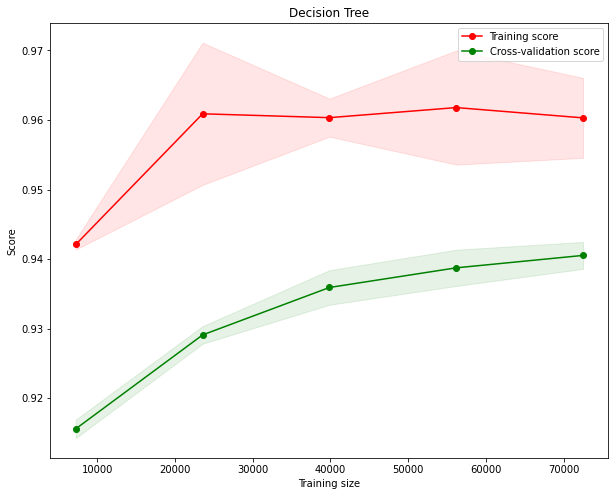

In [59]:
access_model_quality(clf, X_train, y_train, cv=5, img_title='Decision Tree')

模型在训练集与测试集上的准确率同步变化，偏差较小，但是方差较小，在测试集上的准确率较之于在训练集上低于5%，所以的话模型一定程序上发生了过拟合的现象。

The `accuracy` of the model in the training set and the test set changes synchronously, with `low bais`, but `high variance`. The accuracy in the test set is less than 5% compared with that in the training set. Therefore, the model has over fitting in some programs.

# Task 4. Train a Feed-Forward Neural Net
Train a Feed-Forward neural network that predicts the target. Use Tensorflow/Keras.

You will define your own network architecture. Use only Dense layers, only ReLU activation
functions in the hidden layers, and a single output unit with sigmoid activation function in 
the output layer. Use binary_crossentropy as the loss function.

Aim to develop the simplest (fewest layers/units) that predicts no worse than the decision 
tree classifier created in Task 3.

Remember that normalisation of the input data can have a significant impact on the 
performance of a neural net model.

Describe the process and decisions that you have employed to arrive at the final neural net 
architecture. Justify the selection of the number of hidden layers and units per layer and 
explain the (iterative) process that you have followed while optimising the neural net. 
Explain how you have chosen the values for any hyperparameters that you may have set 
(such as batch size, number of epochs, learning rate).
Assess the model’s quality of fit (bias/variance).

In [60]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

Using TensorFlow backend.


In [61]:
def process_y(y):
    new_y = []
    for i in y:
        if i == 0:
            item = [1, 0]
        else:
            item = [0, 1]
        new_y.append(item)
    return np.array(new_y)
train_y = process_y(y_train)
test_y = process_y(y_test)
valid_y = process_y(y_valid)

In [165]:
# normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

ImportError: cannot import name 'MaxMinScaler' from 'sklearn.preprocessing' (/Users/renweiqiang/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [131]:
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [132]:
model.fit(X_train, train_y, batch_size=32, epochs=32, verbose=1, validation_data=(X_valid, valid_y))

Train on 90640 samples, validate on 19424 samples
Epoch 1/32
90640/90640 [==============================] - 3s 29us/step - loss: 0.1900 - accuracy: 0.9238 - val_loss: 0.1450 - val_accuracy: 0.941669 - 
Epoch 2/32
90640/90640 [==============================] - 2s 26us/step - loss: 0.1312 - accuracy: 0.9462 - val_loss: 0.1258 - val_accuracy: 0.9509
Epoch 3/32
90640/90640 [==============================] - 2s 27us/step - loss: 0.1129 - accuracy: 0.9531 - val_loss: 0.1125 - val_accuracy: 0.9527
Epoch 4/32
90640/90640 [==============================] - 3s 29us/step - loss: 0.1044 - accuracy: 0.9565 - val_loss: 0.1088 - val_accuracy: 0.9544
Epoch 5/32
90640/90640 [==============================] - 2s 24us/step - loss: 0.0992 - accuracy: 0.9578 - val_loss: 0.1100 - val_accuracy: 0.9556
Epoch 6/32
90640/90640 [==============================] - 2s 24us/step - loss: 0.0958 - accuracy: 0.9595 - val_loss: 0.1047 - val_accuracy: 0.9550
Epoch 7/32
90640/90640 [==============================] - 2s 23

In [133]:
y_pred = model.predict(X_test, batch_size=32).argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     10933
           1       0.97      0.94      0.95      8490

    accuracy                           0.96     19423
   macro avg       0.96      0.96      0.96     19423
weighted avg       0.96      0.96      0.96     19423



In [134]:
print(f1_score(y_test, y_pred))

0.9549356223175965


In [87]:
from keras.wrappers.scikit_learn import KerasClassifier

In [139]:
def create_model(hidden_dim1, hidden_dim2, lr):
    """
    define the neural model
    """
    model = Sequential()
    model.add(Dense(hidden_dim1, input_shape=(X.shape[1],), activation="relu"))
    model.add(Dense(hidden_dim2, activation="relu"))
    model.add(Dense(2, activation="sigmoid"))
    optimizer = optimizers.Adam(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [140]:
batch_size = [32, 64, 128]
epochs = [20, 30]
learn_rate = [0.001, 0.01, 0.1]
hidden_dim1 = [16, 32, 64, 128]
hidden_dim2 = [16, 32, 64, 128]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs, lr=learn_rate, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

In [141]:
grid_result = grid.fit(X_train, train_y, validation_data=(X_valid, valid_y))

/Users/renweiqiang/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [142]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.948968 using {'batch_size': 128, 'hidden_dim1': 64, 'hidden_dim2': 128, 'lr': 0.01, 'nb_epoch': 20}


In [143]:
y_pred = grid.predict(X_test)
print(f1_score(y_test, y_pred))

0.9404875717017208


Describe the process and decisions that you have employed to arrive at the final neural net architecture. 

firstly, we normalize the train、test、valid dataset. We set 2 hidden layers. On the first layer, we set the the number of neurons range from `16` to `128`. The second layer is the same number.

We set the other params such as `bacth_size`、`number of epochs`、`learning rate` then use `grid search` to find the bast param.
best params are below:

> Best: 0.948968 using {'batch_size': 128, 'hidden_dim1': 64, 'hidden_dim2': 128, 'lr': 0.01, 'nb_epoch': 20}

In [159]:
clf = create_model(hidden_dim1=64, hidden_dim2=128, lr=0.01)
clf.fit(X_train, train_y, batch_size=128, epochs=100, verbose=1, validation_data=(X_valid, valid_y))

Train on 90640 samples, validate on 19424 samples
Epoch 1/100
90640/90640 [==============================] - 1s 9us/step - loss: 0.1601 - accuracy: 0.9345 - val_loss: 0.1230 - val_accuracy: 0.9498
Epoch 2/100
90640/90640 [==============================] - 1s 8us/step - loss: 0.1136 - accuracy: 0.9524 - val_loss: 0.1104 - val_accuracy: 0.9553
Epoch 3/100
90640/90640 [==============================] - 1s 8us/step - loss: 0.1047 - accuracy: 0.9561 - val_loss: 0.1076 - val_accuracy: 0.9550
Epoch 4/100
90640/90640 [==============================] - 1s 8us/step - loss: 0.0985 - accuracy: 0.9582 - val_loss: 0.1030 - val_accuracy: 0.9561
Epoch 5/100
90640/90640 [==============================] - 1s 9us/step - loss: 0.0942 - accuracy: 0.9602 - val_loss: 0.0964 - val_accuracy: 0.9587
Epoch 6/100
90640/90640 [==============================] - 1s 10us/step - loss: 0.0908 - accuracy: 0.9611 - val_loss: 0.0965 - val_accuracy: 0.9583
Epoch 7/100
90640/90640 [==============================] - 1s 9us/s

In [160]:
y_pred = clf.predict(X_test, batch_size=32).argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10933
           1       0.97      0.94      0.96      8490

    accuracy                           0.96     19423
   macro avg       0.96      0.96      0.96     19423
weighted avg       0.96      0.96      0.96     19423



In [161]:
print(f1_score(y_test, y_pred))

0.9553555462836025


In [162]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

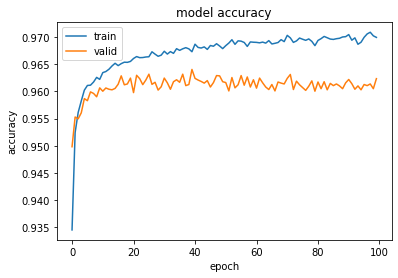

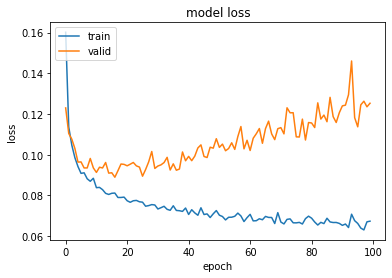

In [163]:
history = clf.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Compare the results of the models trained in Task 2-4 and identify the best model. 

Which of the models exhibits best results? 

Estimate the expected performance of the chosen model on unseen data.

Discuss the results.

`The neural network model` exhibits best result. 
The `F1 Score` of the 3 classifiers on the test dataset are below:
- linear Regression: 0.87
- Decision Tree: 0.942
- Neural Network: 0.955